# Разведочный анализ данных

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
from numpy import radians, sin, cos, arccos
import matplotlib.pyplot as plt
import seaborn as sns


from scipy.stats import mannwhitneyu
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import DBSCAN
from scipy.stats import zscore
import h3
from scipy.stats import entropy


In [ ]:
df = pd.read_csv('../data/raw_data/train.csv')

In [ ]:
df.head()

,transaction_time,merch,cat_id,amount,name_1,name_2,gender,street,one_city,us_state,post_code,lat,lon,population_city,jobs,merchant_lat,merchant_lon,target
0,2019-12-27 15:21,fraud_Cormier LLC,health_fitness,148.04,Daniel,Martinez,M,8510 Acevedo Burgs,Kent,OR,97033,45.0838,-120.6649,60,Museum education officer,45.042827,-120.709327,0
1,2019-04-17 23:09,"fraud_Brown, Homenick and Lesch",health_fitness,39.40,Grace,Williams,F,28812 Charles Mill Apt. 628,Plantersville,AL,36758,32.6176,-86.9475,1412,Drilling engineer,31.872266,-87.828247,0
2,2019-09-23 15:02,fraud_Ruecker-Mayert,kids_pets,52.96,Kyle,Park,M,7507 Larry Passage Suite 859,Mount Perry,OH,43760,39.8788,-82.1880,1831,Barrister's clerk,40.010874,-81.841249,0
3,2019-05-13 16:00,"fraud_Mante, Luettgen and Hackett",health_fitness,7.66,Monique,Martin,F,68276 Matthew Springs,Ratcliff,TX,75858,31.3833,-95.0619,43,"Engineer, production",30.888406,-95.141609,0
4,2019-08-18 07:27,fraud_Luettgen PLC,gas_transport,51.59,Christine,Johnson,F,8011 Chapman Tunnel Apt. 568,Blairsden-Graeagle,CA,96103,39.8127,-120.6405,1725,Chartered legal executive (England and Wales),39.376017,-121.311691,0


In [ ]:
df.columns

Index(['transaction_time', 'merch', 'cat_id', 'amount', 'name_1', 'name_2',
       'gender', 'street', 'one_city', 'us_state', 'post_code', 'lat', 'lon',
       'population_city', 'jobs', 'merchant_lat', 'merchant_lon', 'target'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786431 entries, 0 to 786430
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaction_time  786431 non-null  object 
 1   merch             786431 non-null  object 
 2   cat_id            786431 non-null  object 
 3   amount            786431 non-null  float64
 4   name_1            786431 non-null  object 
 5   name_2            786431 non-null  object 
 6   gender            786431 non-null  object 
 7   street            786431 non-null  object 
 8   one_city          786431 non-null  object 
 9   us_state          786431 non-null  object 
 10  post_code         786431 non-null  int64  
 11  lat               786431 non-null  float64
 12  lon               786431 non-null  float64
 13  population_city   786431 non-null  int64  
 14  jobs              786431 non-null  object 
 15  merchant_lat      786431 non-null  float64
 16  merchant_lon      78

In [ ]:
df.isnull().sum()

transaction_time    0
merch               0
cat_id              0
amount              0
name_1              0
name_2              0
gender              0
street              0
one_city            0
us_state            0
post_code           0
lat                 0
lon                 0
population_city     0
jobs                0
merchant_lat        0
merchant_lon        0
target              0
dtype: int64

In [ ]:
features = [
    'transaction_time',
    'merch',
    'cat_id',
    'amount',
    'name_1',
    'name_2',
    'gender',
    'street',
    'one_city',
    'us_state',
    'post_code',
    'lat',
    'lon',
    'population_city',
    'jobs',
    'merchant_lat',
    'merchant_lon',
    'target'
]

In [ ]:
numerical_features = []
cat_features = []

for feature in features:
    if df[feature].dtype == 'O':
        cat_features.append(feature)
    else:
        numerical_features.append(feature)

In [ ]:
print(numerical_features)
print(cat_features)

['amount', 'post_code', 'lat', 'lon', 'population_city', 'merchant_lat', 'merchant_lon', 'target']
['transaction_time', 'merch', 'cat_id', 'name_1', 'name_2', 'gender', 'street', 'one_city', 'us_state', 'jobs']


In [ ]:
df[['amount','population_city']].describe()

,amount,population_city
count,786431.000000,7.864310e+05
mean,70.241296,8.928853e+04
std,161.091489,3.028600e+05
min,1.000000,2.300000e+01
25%,9.650000,7.430000e+02
50%,47.410000,2.456000e+03
75%,83.000000,2.047800e+04
max,27390.120000,2.906700e+06


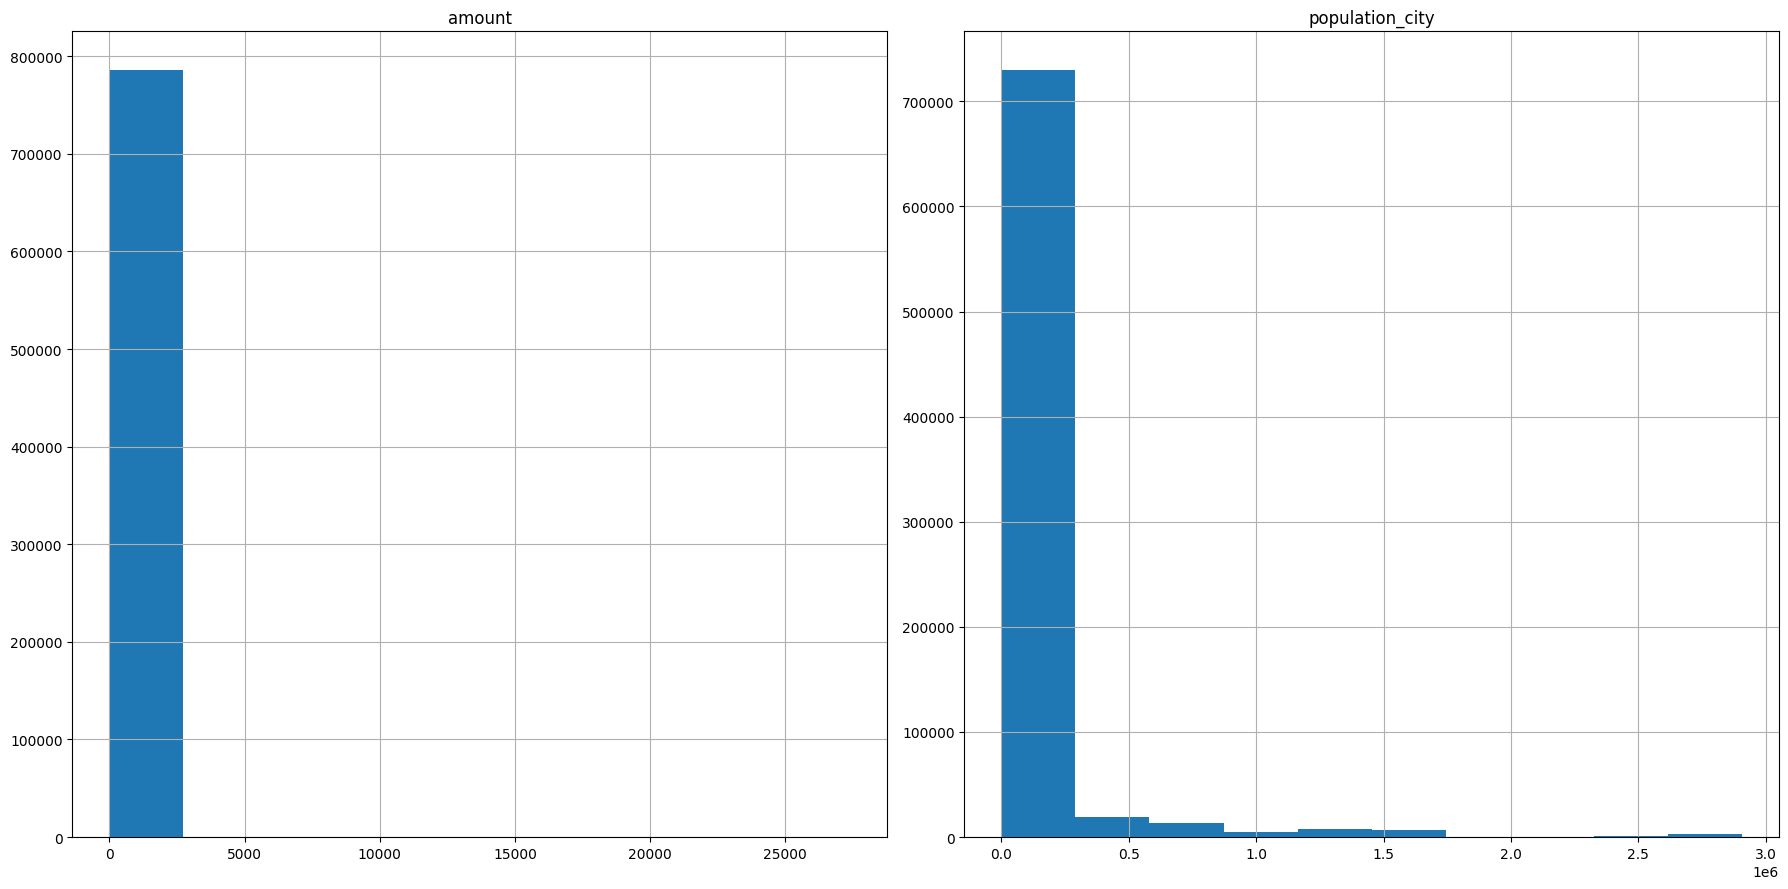

In [ ]:
df[['amount','population_city']].hist(figsize=(18, 9))
plt.tight_layout()
plt.show()

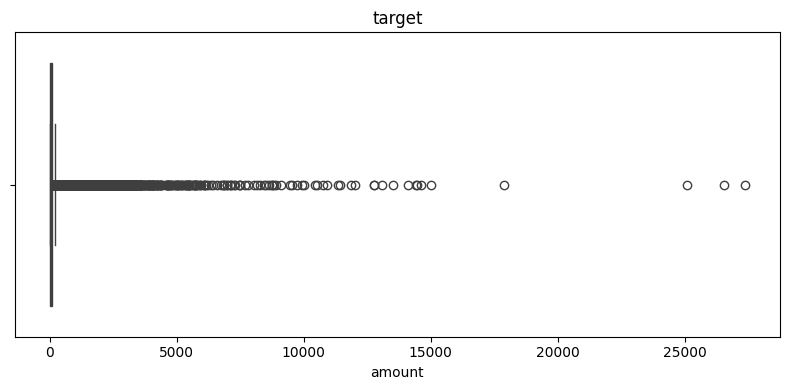

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(x = df['amount'])
plt.title(feature)
plt.tight_layout()
plt.show()

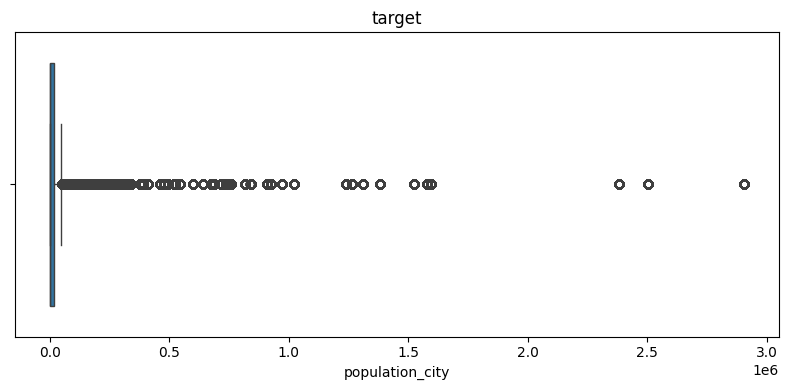

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(x = df['population_city'])
plt.title(feature)
plt.tight_layout()
plt.show()

## На данном этапе отметим явное количество выбросов в признаках Сумма перевода (amount) и Население города (population city)

## Посмотрим различия у разных групп таргета 1 и 0

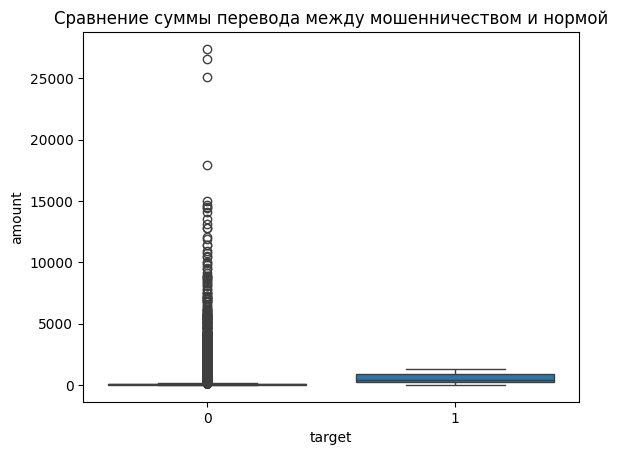

In [ ]:
sns.boxplot(x='target', y='amount', data=df)
plt.title("Сравнение суммы перевода между мошенничеством и нормой")
plt.show()

<Axes: xlabel='target', ylabel='amount_log'>

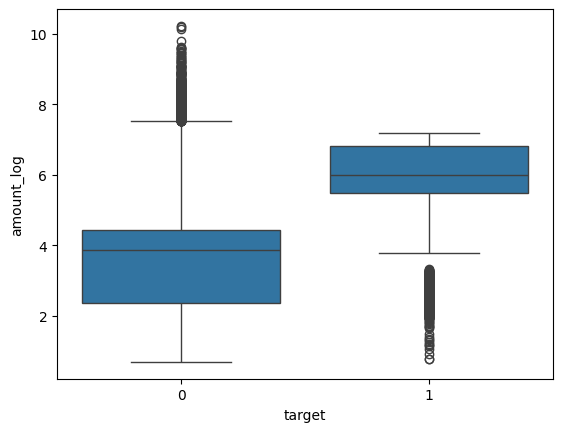

In [ ]:
df['amount_log'] = np.log1p(df['amount'])
sns.boxplot(x='target', y='amount_log', data=df)

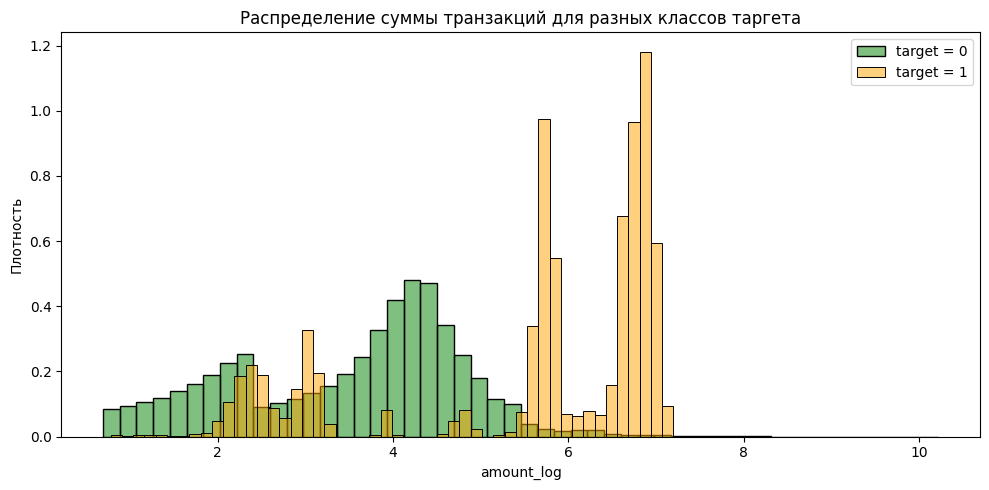

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df[df['target'] == 0]['amount_log'], 
             bins=50, color='green', alpha=0.5, label='target = 0', stat='density')
sns.histplot(df[df['target'] == 1]['amount_log'], 
             bins=50, color='orange', alpha=0.5, label='target = 1', stat='density')
plt.title('Распределение суммы транзакций для разных классов таргета')
plt.xlabel('amount_log')
plt.ylabel('Плотность')
plt.legend()
plt.tight_layout()
plt.show()

## Вывод: мошенники чаще совершают транзакции с большей и более стабильной суммой, чем обычные пользователи

## Теперь взглянем на количество жителей в городах, из которых проводились транзакции

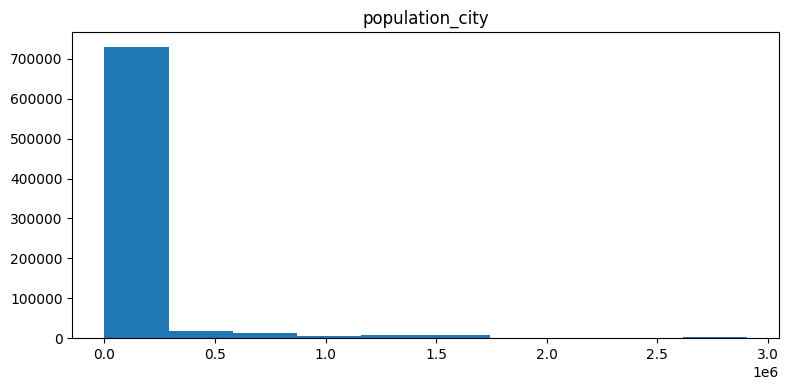

In [ ]:
plt.figure(figsize=(8,4))
plt.hist(x = df['population_city'])
plt.title('population_city')
plt.tight_layout()
plt.show()

In [ ]:
df['population_log'] = np.log1p(df['population_city'])

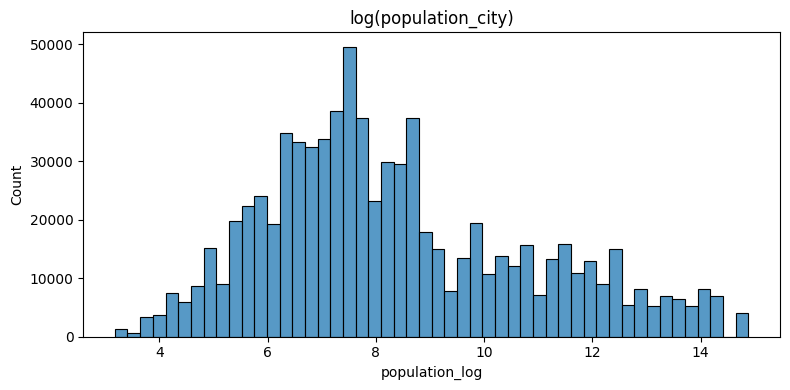

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(df['population_log'], bins=50)
plt.title('log(population_city)')
plt.tight_layout()
plt.show()

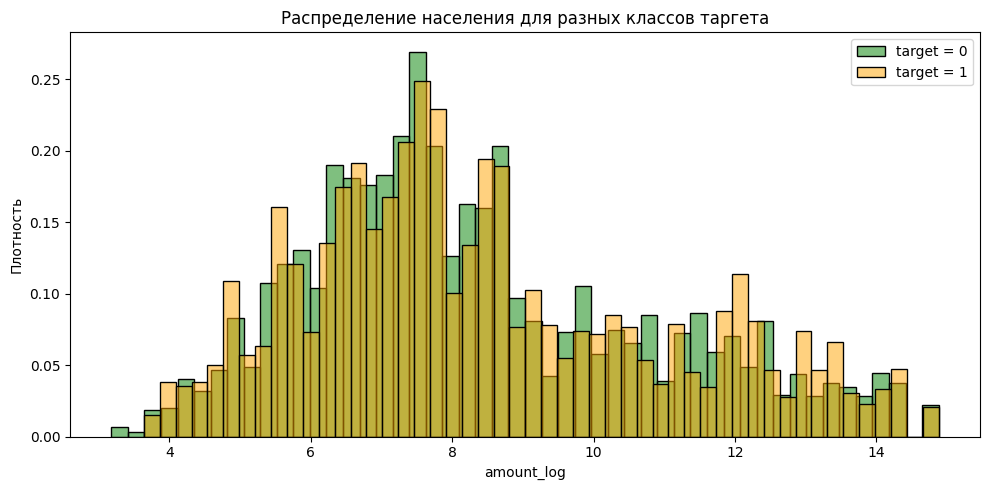

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df[df['target'] == 0]['population_log'], 
             bins=50, color='green', alpha=0.5, label='target = 0', stat='density')
sns.histplot(df[df['target'] == 1]['population_log'], 
             bins=50, color='orange', alpha=0.5, label='target = 1', stat='density')
plt.title('Распределение населения для разных классов таргета')
plt.xlabel('amount_log')
plt.ylabel('Плотность')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
g0_sample = df[df['target'] == 0]['population_log'].sample(n=10000, random_state=42)
g1_sample = df[df['target'] == 1]['population_log']
stat, p = mannwhitneyu(g0_sample, g1_sample, alternative='two-sided')

print(f"P-value: {p:2f}")

P-value: 0.236549


не отвергаем нулевую гипотезу -> различий между группами нет

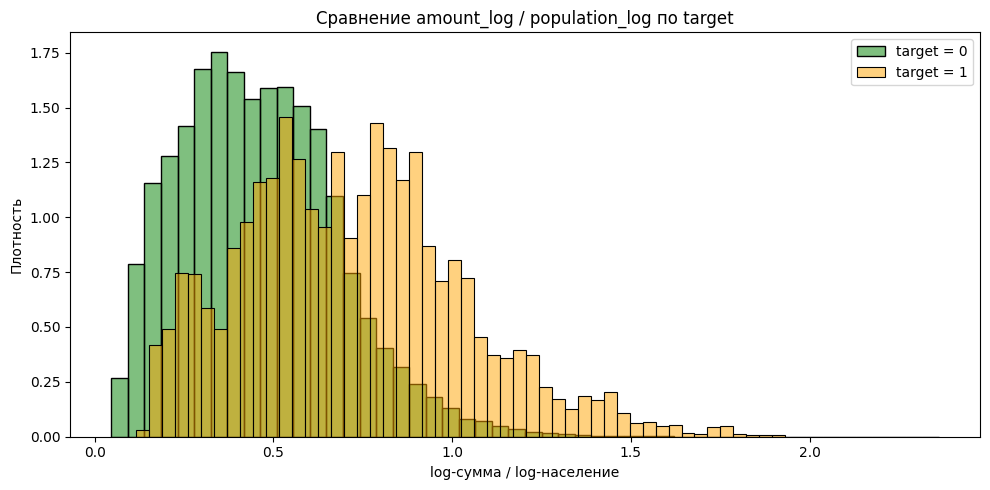

In [ ]:
df['amount_per_person'] = df['amount_log'] / df['population_log']

plt.figure(figsize=(10, 5))
sns.histplot(df[df['target'] == 0]['amount_per_person'], color='green', label='target = 0', stat='density', bins=50, alpha=0.5)
sns.histplot(df[df['target'] == 1]['amount_per_person'], color='orange', label='target = 1', stat='density', bins=50, alpha=0.5)

plt.title('Сравнение amount_log / population_log по target')
plt.xlabel('log-сумма / log-население')
plt.ylabel('Плотность')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
g0 = df[df['target'] == 0]['amount_per_person']
g1 = df[df['target'] == 1]['amount_per_person']

stat, p = mannwhitneyu(g0.sample(n=10000, random_state=42), g1)
print(f"P-value: {p}")

P-value: 0.0


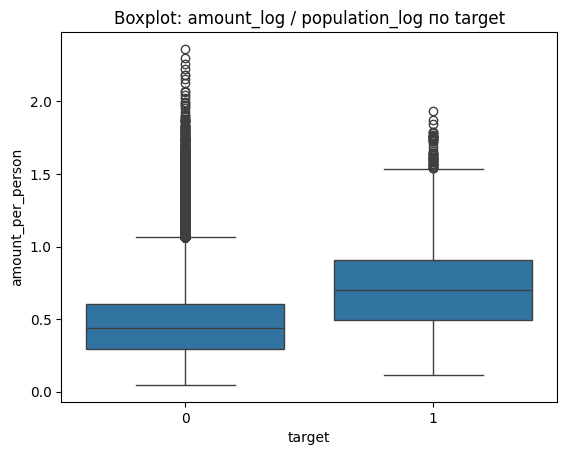

In [ ]:
sns.boxplot(x='target', y='amount_per_person', data=df)
plt.title('Boxplot: amount_log / population_log по target')
plt.show()

In [ ]:
df.head(1)

,transaction_time,merch,cat_id,amount,name_1,name_2,gender,street,one_city,us_state,post_code,lat,lon,population_city,jobs,merchant_lat,merchant_lon,target,amount_log,population_log,amount_per_person
0,2019-12-27 15:21,fraud_Cormier LLC,health_fitness,148.04,Daniel,Martinez,M,8510 Acevedo Burgs,Kent,OR,97033,45.0838,-120.6649,60,Museum education officer,45.042827,-120.709327,0,5.004215,4.110874,1.217312


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786431 entries, 0 to 786430
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   transaction_time   786431 non-null  object 
 1   merch              786431 non-null  object 
 2   cat_id             786431 non-null  object 
 3   amount             786431 non-null  float64
 4   name_1             786431 non-null  object 
 5   name_2             786431 non-null  object 
 6   gender             786431 non-null  object 
 7   street             786431 non-null  object 
 8   one_city           786431 non-null  object 
 9   us_state           786431 non-null  object 
 10  post_code          786431 non-null  int64  
 11  lat                786431 non-null  float64
 12  lon                786431 non-null  float64
 13  population_city    786431 non-null  int64  
 14  jobs               786431 non-null  object 
 15  merchant_lat       786431 non-null  float64
 16  me

In [ ]:
df['transaction_time'] = pd.to_datetime(df['transaction_time'])
df['hour'] = df['transaction_time'].dt.hour
df['weekday'] = df['transaction_time'].dt.weekday
df['is_night'] = df['hour'].isin([0, 1, 2, 3, 4, 5]).astype(int)

Text(0.5, 1.0, 'Фрод в ночное время')

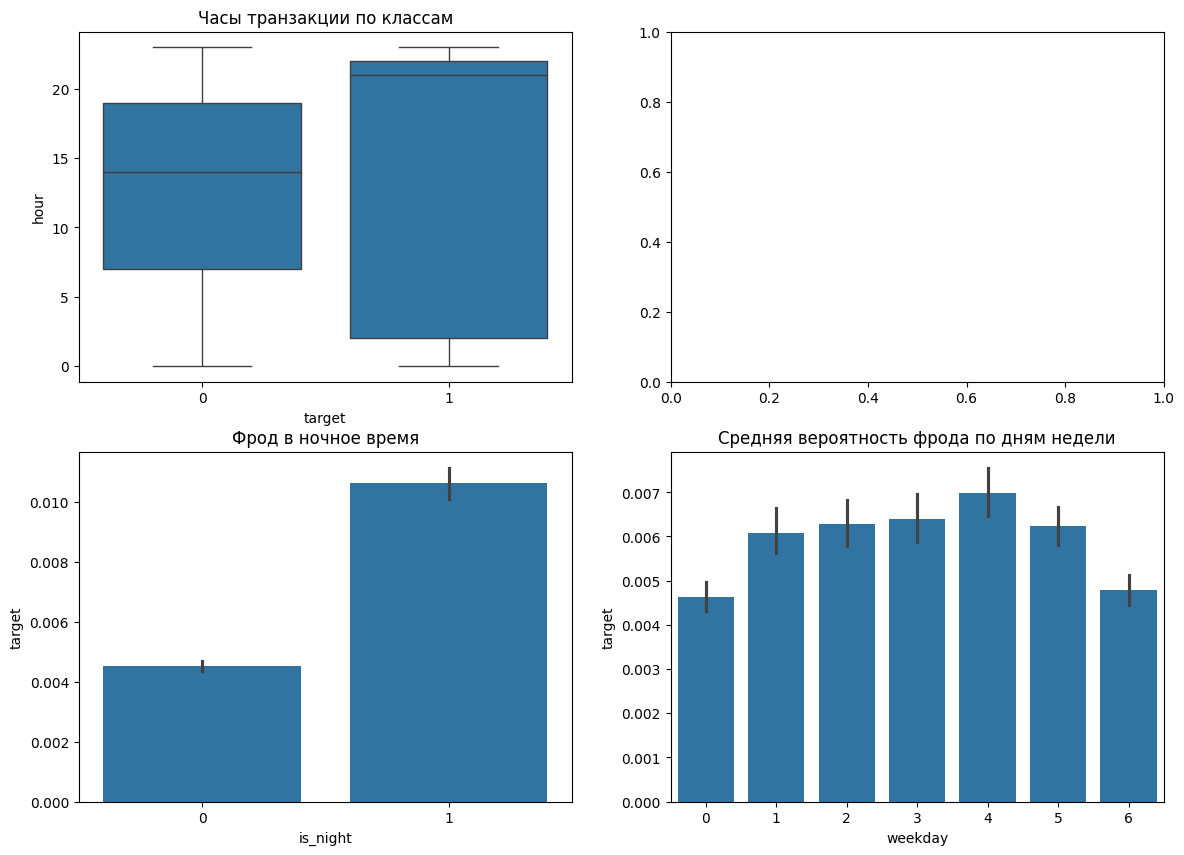

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

sns.boxplot(x='target', y='hour', data=df, ax=axs[0, 0])
axs[0, 0].set_title('Часы транзакции по классам')

sns.barplot(x='weekday', y='target', data=df)
plt.title('Средняя вероятность фрода по дням недели')

sns.barplot(x='is_night', y='target', data=df, ax=axs[1, 0])
axs[1, 0].set_title('Фрод в ночное время')

/var/folders/1z/6183pjz17zd977k63z7mld6r0000gn/T/ipykernel_7337/312214946.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mean', y=col_name, data=stats, palette='viridis')


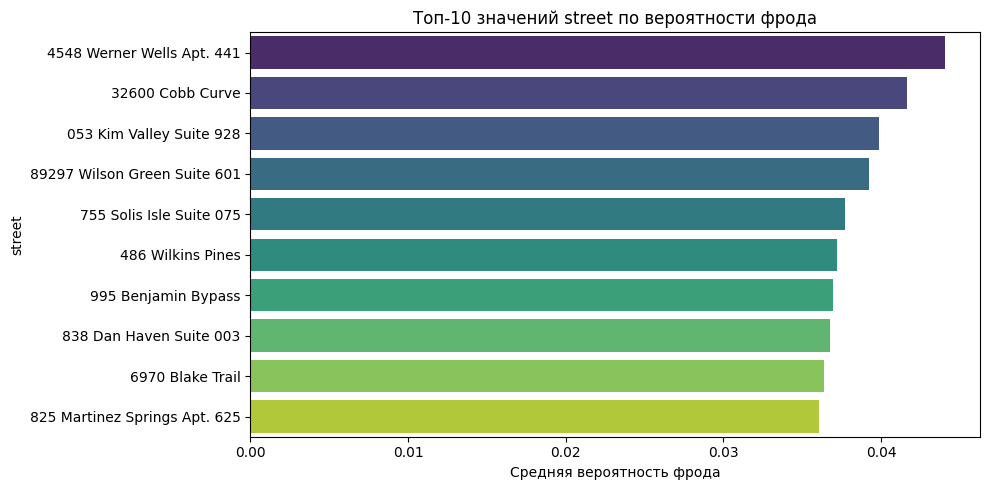

/var/folders/1z/6183pjz17zd977k63z7mld6r0000gn/T/ipykernel_7337/312214946.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mean', y=col_name, data=stats, palette='viridis')


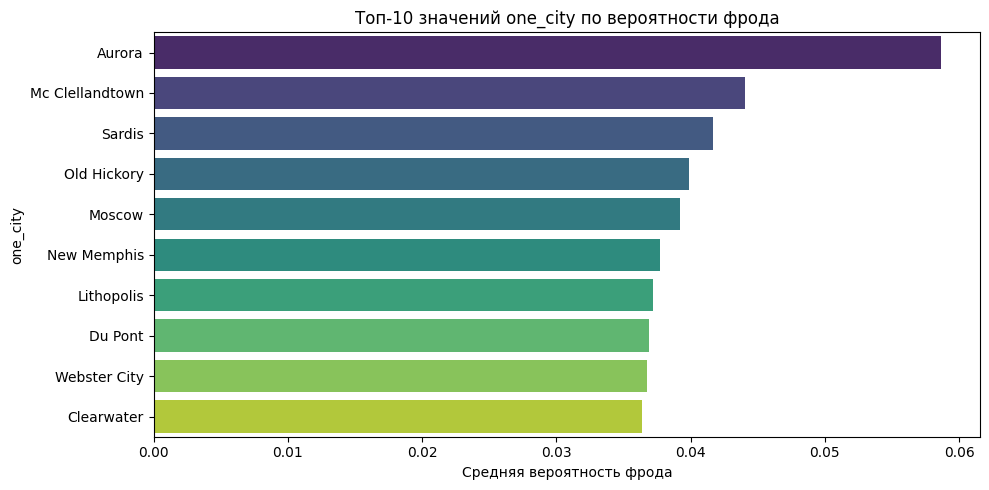

/var/folders/1z/6183pjz17zd977k63z7mld6r0000gn/T/ipykernel_7337/312214946.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mean', y=col_name, data=stats, palette='viridis')


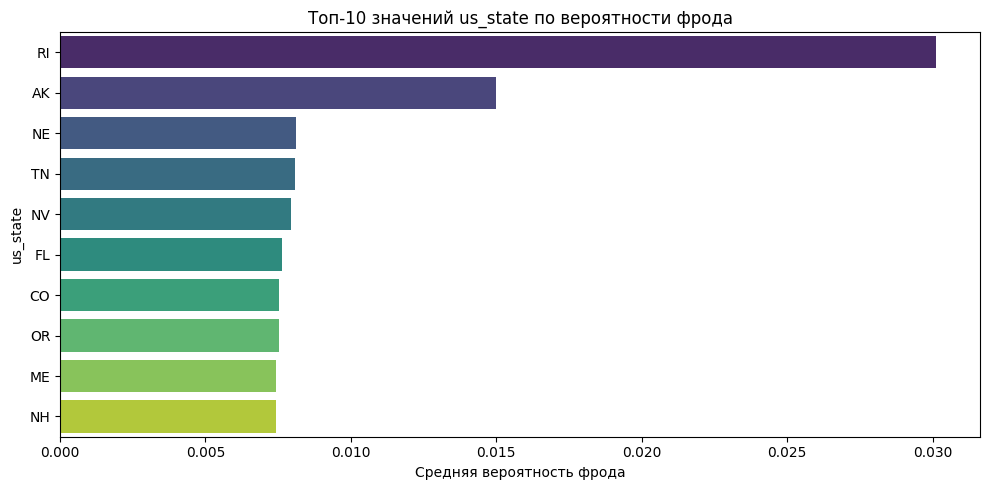

/var/folders/1z/6183pjz17zd977k63z7mld6r0000gn/T/ipykernel_7337/312214946.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mean', y=col_name, data=stats, palette='viridis')


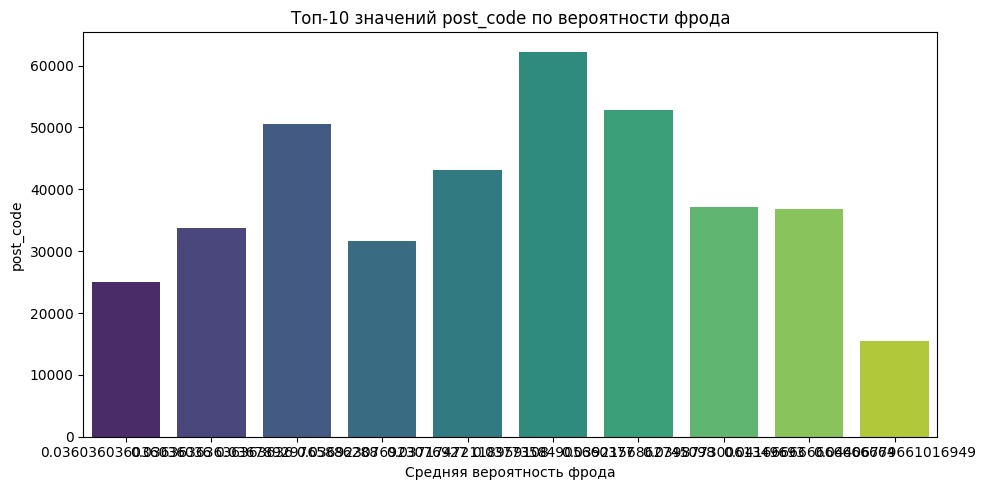

In [ ]:
min_count = 100

def plot_fraud_by_category(col_name, top_n=10):
    stats = df.groupby(col_name)['target'].agg(['mean', 'count']).reset_index()
    stats = stats[stats['count'] >= min_count]  
    stats = stats.sort_values('mean', ascending=False).head(top_n)

    plt.figure(figsize=(10, 5))
    sns.barplot(x='mean', y=col_name, data=stats, palette='viridis')
    plt.title(f'Топ-{top_n} значений {col_name} по вероятности фрода')
    plt.xlabel('Средняя вероятность фрода')
    plt.ylabel(col_name)
    plt.tight_layout()
    plt.show()

for col in ['street', 'one_city', 'us_state', 'post_code']:
    plot_fraud_by_category(col)

In [70]:
import folium

center_lat = df['lat'].mean()
center_lon = df['lon'].mean()

m = folium.Map(location=[center_lat, center_lon], zoom_start=5, tiles="cartodbpositron")

for _, row in gdf.iterrows():
    folium.Polygon(
        locations=[(lat, lon) for lon, lat in row['geometry'].exterior.coords], 
        color='blue',
        weight=1,
        fill=True,
        fill_opacity=0.4,
        popup=str(row['h3_id'])
    ).add_to(m)

m
